In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
tweets = pd.read_csv('trump_tweets.csv')
tweets.head()

,Unnamed: 0,text,favorites,retweets,date,CleanTweets,cleandate
0,0,"""""""@realJoeMurray: Hopefully tomorrow is the d...",68,40,16.06.2015,""""""" Hopefully tomorrow is the day we start to ...",1
1,1,"""""""@brentcfritz: Today is the day America beco...",95,54,16.06.2015,""""""" Today is the day America becomes great aga...",1
2,2,"""""""@insuraider: @realDonaldTrump is going to m...",58,32,16.06.2015,""""""" is going to make Hillary's head spin tomo...",1
3,3,"""""""@DONJUBBER: @realDonaldTrump Shock the worl...",32,17,16.06.2015,""""""" Shock the",1
4,4,"""""""@PianoBecca: @realDonaldTrump No Amercian, ...",33,23,16.06.2015,""""""" No Amercian, really, can impact such stag...",1


In [3]:
tweets['date'].tail()

34411    06.01.2021
34412    06.01.2021
34413    08.01.2021
34414    08.01.2021
34415    08.01.2021
Name: date, dtype: object

In [4]:
import re

def CleanText(text):
    
    # Remove URLs
    text = re.sub('(http|ftp|https)[^\s]*', '', text)
    # Removes account handles
    text = re.sub('@[^\s]*', '', text)
    # Removes emails
    text = re.sub('[^\s]+@[^\s]\.\[^\s]+', '', text)
    # Remove strings with numbers
    text = re.sub('[^\s]*[0-9]+[^\s]*', '', text)
    
    return text

# Test on a couple of tweets
sel = [23, 45,67,345,8762]

for i in sel:
  print("===================")
  print(tweets.text[i])
  print(CleanText(tweets.text[i]))

# Get the text of the tweets

tweets['CleanTweets'] = tweets['text'].apply(CleanText)
tweets


11AM #MakeAmericaGreatAgain https://t.co/445bOdp6QY
 #MakeAmericaGreatAgain 
Trump Nat'l Golf Club Philadelphia, 360 beautiful acres as designed by Tom Fazio with views of the Philly skyline.  http://t.co/jha0m0W4Kk
Trump Nat'l Golf Club Philadelphia,  beautiful acres as designed by Tom Fazio with views of the Philly skyline.  
People buy deals &amp, immediately put them into bankruptcy in order to make better deals. It’s a very effective &amp, commonly used business tool.
People buy deals &amp, immediately put them into bankruptcy in order to make better deals. It’s a very effective &amp, commonly used business tool.
“TRUMP DECLARES VICTORY ON IMMIGRATION AS OBAMA ADMITS SOME ILLEGALS ARE ‘GANG BANGERS’” http://t.co/e0HLxf1dS2 via @BreitbartNews @ASwoyer
“TRUMP DECLARES VICTORY ON IMMIGRATION AS OBAMA ADMITS SOME ILLEGALS ARE ‘GANG BANGERS’”  via  
Dems have been complaining for months &amp, months about Dir. Comey. Now that he has been fired they PRETEND to be aggrieved. Phony hypocr

,Unnamed: 0,text,favorites,retweets,date,CleanTweets,cleandate
0,0,"""""""@realJoeMurray: Hopefully tomorrow is the d...",68,40,16.06.2015,""""""" Hopefully tomorrow is the day we start to ...",1
1,1,"""""""@brentcfritz: Today is the day America beco...",95,54,16.06.2015,""""""" Today is the day America becomes great aga...",1
2,2,"""""""@insuraider: @realDonaldTrump is going to m...",58,32,16.06.2015,""""""" is going to make Hillary's head spin tomo...",1
3,3,"""""""@DONJUBBER: @realDonaldTrump Shock the worl...",32,17,16.06.2015,""""""" Shock the",1
4,4,"""""""@PianoBecca: @realDonaldTrump No Amercian, ...",33,23,16.06.2015,""""""" No Amercian, really, can impact such stag...",1
...,...,...,...,...,...,...,...
34411,34411,https://t.co/Pm2PKV0Fp3,0,0,06.01.2021,,59491
34412,34412,These are the things and events that happen wh...,0,0,06.01.2021,These are the things and events that happen wh...,59491
34413,34413,https://t.co/csX07ZVWGe,629326,154877,08.01.2021,,59493
34414,34414,"The 75,000,000 great American Patriots who vot...",480997,108844,08.01.2021,"The great American Patriots who voted for me,...",59493


In [6]:
!pip install vaderSentiment

You should consider upgrading via the '/Users/Ivan/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [5]:
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [6]:
def sentiment_scores(sentence):
 
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
 
    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(sentence)
     
    print("Overall sentiment dictionary is : ", sentiment_dict)
    print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
    print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
    print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive")
 
    print("Sentence Overall Rated As", end = " ")
 
    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= 0.05 :
        print("Positive")
 
    elif sentiment_dict['compound'] <= - 0.05 :
        print("Negative")
 
    else :
        print("Neutral")

In [7]:
sentence = tweets.CleanTweets[4342]
print(sentence)

.  as per the show, an even more serious Cruz charge is the fraudulent voter violation certificate sent to everyone.


In [8]:
sentiment_scores(sentence)

Overall sentiment dictionary is :  {'neg': 0.32, 'neu': 0.68, 'pos': 0.0, 'compound': -0.7902}
sentence was rated as  32.0 % Negative
sentence was rated as  68.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Negative


In [9]:
def neg_raw_sentiment_scores(text):
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(text)
    return sentiment_dict['neg']

def pos_raw_sentiment_scores(text):
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(text)
    return sentiment_dict['pos']

def neu_raw_sentiment_scores(text):
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(text)
    return sentiment_dict['neu']

In [10]:
def comp_raw_sentiment_scores(text):
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(text)
    return sentiment_dict['compound']

In [23]:
tweets['positive'] = tweets['CleanTweets'].apply(pos_raw_sentiment_scores)
tweets['negative'] = tweets['CleanTweets'].apply(neg_raw_sentiment_scores)
tweets['neutral'] = tweets['CleanTweets'].apply(neu_raw_sentiment_scores)
tweets['compound'] = tweets['CleanTweets'].apply(comp_raw_sentiment_scores)
tweets.head()

,text,favorites,retweets,date,CleanTweets,cleandate,positive,negative,neutral,compound
0,"""""""@realJoeMurray: Hopefully tomorrow is the d...",68,40,16.06.2015,""""""" Hopefully tomorrow is the day we start to ...",1,0.321,0.000,0.679,0.7959
1,"""""""@brentcfritz: Today is the day America beco...",95,54,16.06.2015,""""""" Today is the day America becomes great aga...",1,0.267,0.108,0.625,0.5859
2,"""""""@insuraider: @realDonaldTrump is going to m...",58,32,16.06.2015,""""""" is going to make Hillary's head spin tomo...",1,0.294,0.000,0.706,0.6124
3,"""""""@DONJUBBER: @realDonaldTrump Shock the worl...",32,17,16.06.2015,""""""" Shock the",1,0.000,0.565,0.435,-0.3818
4,"""""""@PianoBecca: @realDonaldTrump No Amercian, ...",33,23,16.06.2015,""""""" No Amercian, really, can impact such stag...",1,0.453,0.079,0.467,0.9083


In [17]:
tweets[['day', 'month', 'year']] = tweets['date'].str.split('.', 2, expand=True)

# no_missing_tweets['cleantime'] = no_missing_tweets['cleantime'].astype(int)
tweets['day'] = tweets['day'].astype(int)
tweets['month'] = tweets['month'].astype(int)
tweets['year'] = tweets['year'].astype(int)

# df['Discounted_Price'] = df['Cost'] - (0.1 * df['Cost'])
tweets['cleandate'] = tweets['year']*10000 + tweets['month']*100 + tweets['day'] - 20150615
tweets

,Unnamed: 0,text,favorites,retweets,date,CleanTweets,cleandate,day,month,year
0,0,"""""""@realJoeMurray: Hopefully tomorrow is the d...",68,40,16.06.2015,""""""" Hopefully tomorrow is the day we start to ...",1,16,6,2015
1,1,"""""""@brentcfritz: Today is the day America beco...",95,54,16.06.2015,""""""" Today is the day America becomes great aga...",1,16,6,2015
2,2,"""""""@insuraider: @realDonaldTrump is going to m...",58,32,16.06.2015,""""""" is going to make Hillary's head spin tomo...",1,16,6,2015
3,3,"""""""@DONJUBBER: @realDonaldTrump Shock the worl...",32,17,16.06.2015,""""""" Shock the",1,16,6,2015
4,4,"""""""@PianoBecca: @realDonaldTrump No Amercian, ...",33,23,16.06.2015,""""""" No Amercian, really, can impact such stag...",1,16,6,2015
...,...,...,...,...,...,...,...,...,...,...
34411,34411,https://t.co/Pm2PKV0Fp3,0,0,06.01.2021,,59491,6,1,2021
34412,34412,These are the things and events that happen wh...,0,0,06.01.2021,These are the things and events that happen wh...,59491,6,1,2021
34413,34413,https://t.co/csX07ZVWGe,629326,154877,08.01.2021,,59493,8,1,2021
34414,34414,"The 75,000,000 great American Patriots who vot...",480997,108844,08.01.2021,"The great American Patriots who voted for me,...",59493,8,1,2021


In [19]:
del tweets['month']
del tweets['year']

tweets

,Unnamed: 0,text,favorites,retweets,date,CleanTweets,cleandate
0,0,"""""""@realJoeMurray: Hopefully tomorrow is the d...",68,40,16.06.2015,""""""" Hopefully tomorrow is the day we start to ...",1
1,1,"""""""@brentcfritz: Today is the day America beco...",95,54,16.06.2015,""""""" Today is the day America becomes great aga...",1
2,2,"""""""@insuraider: @realDonaldTrump is going to m...",58,32,16.06.2015,""""""" is going to make Hillary's head spin tomo...",1
3,3,"""""""@DONJUBBER: @realDonaldTrump Shock the worl...",32,17,16.06.2015,""""""" Shock the",1
4,4,"""""""@PianoBecca: @realDonaldTrump No Amercian, ...",33,23,16.06.2015,""""""" No Amercian, really, can impact such stag...",1
...,...,...,...,...,...,...,...
34411,34411,https://t.co/Pm2PKV0Fp3,0,0,06.01.2021,,59491
34412,34412,These are the things and events that happen wh...,0,0,06.01.2021,These are the things and events that happen wh...,59491
34413,34413,https://t.co/csX07ZVWGe,629326,154877,08.01.2021,,59493
34414,34414,"The 75,000,000 great American Patriots who vot...",480997,108844,08.01.2021,"The great American Patriots who voted for me,...",59493


In [21]:
tweets.drop(columns=tweets.columns[0], 
        axis=1, 
        inplace=True)

In [22]:
tweets

,text,favorites,retweets,date,CleanTweets,cleandate
0,"""""""@realJoeMurray: Hopefully tomorrow is the d...",68,40,16.06.2015,""""""" Hopefully tomorrow is the day we start to ...",1
1,"""""""@brentcfritz: Today is the day America beco...",95,54,16.06.2015,""""""" Today is the day America becomes great aga...",1
2,"""""""@insuraider: @realDonaldTrump is going to m...",58,32,16.06.2015,""""""" is going to make Hillary's head spin tomo...",1
3,"""""""@DONJUBBER: @realDonaldTrump Shock the worl...",32,17,16.06.2015,""""""" Shock the",1
4,"""""""@PianoBecca: @realDonaldTrump No Amercian, ...",33,23,16.06.2015,""""""" No Amercian, really, can impact such stag...",1
...,...,...,...,...,...,...
34411,https://t.co/Pm2PKV0Fp3,0,0,06.01.2021,,59491
34412,These are the things and events that happen wh...,0,0,06.01.2021,These are the things and events that happen wh...,59491
34413,https://t.co/csX07ZVWGe,629326,154877,08.01.2021,,59493
34414,"The 75,000,000 great American Patriots who vot...",480997,108844,08.01.2021,"The great American Patriots who voted for me,...",59493


In [24]:
trump_tweets_csv_data_clean2 = tweets.to_csv('trump_tweets_clean3.csv', index = True)
print('\nCSV String:\n', trump_tweets_csv_data_clean2)


CSV String:
 None


In [57]:
trump_x = tweets.compound.tail(400)

In [58]:
date_y = tweets.date.tail(400)

In [62]:
fig, axs = plt.subplots()
axs.plot(tweets.date, tweets.positive)
axs.set_xlim()
axs.set_xlabel('Time')
axs.set_ylabel('Positive Sentiment')
axs.grid(True)

# cxy, f = axs[1].cohere(tweets.compound, )
# axs[1].set_ylabel('coherence')

# fig.tight_layout()
plt.show()
# plt.savefig('trump_positive_ts.png')


KeyboardInterrupt



## Word Cloud

In [66]:
!pip install wordcloud

     |████████████████████████████████| 220 kB 1.1 MB/s eta 0:00:01
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp39-cp39-macosx_10_9_x86_64.whl size=153837 sha256=d72c42108f98b5ff1831df9435eb4a61932b416ebedb27c785e52bb37e384222
  Stored in directory: /Users/Ivan/Library/Caches/pip/wheels/f9/7a/dd/06ef8b5dfe5483f6204133c08eeb16c287cc2c05e290ae2fc0
Successfully built wordcloud
You should consider upgrading via the '/Users/Ivan/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [72]:
string = pd.Series(tweets.CleanTweets).str.cat(sep=' ')

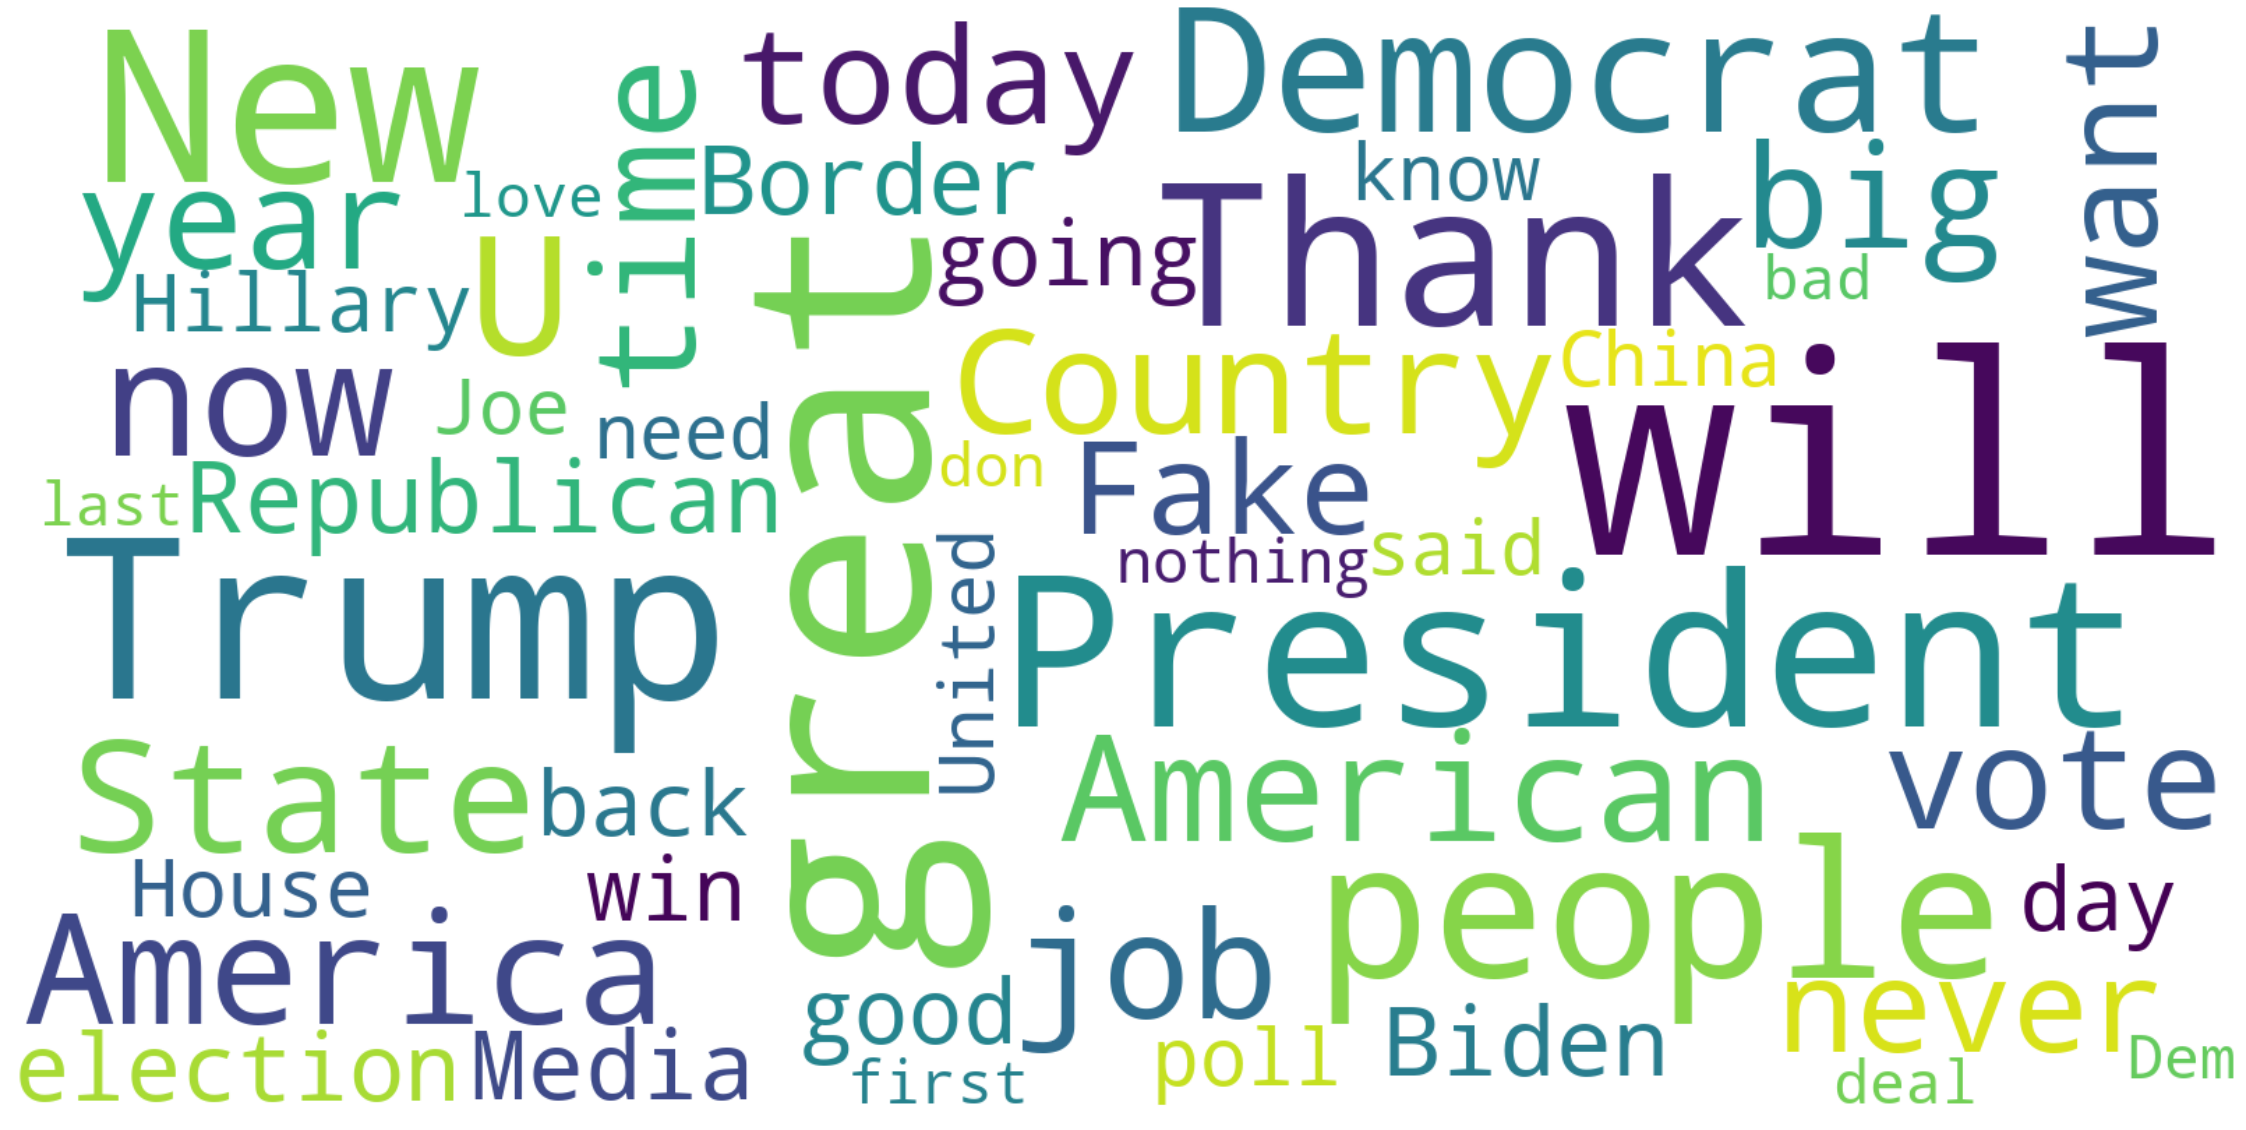

In [80]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
stopwords.update(["RT","one","much","must","make", "many", "done", "t", "say", "see", "way", "even", "s", "amp"]) #adding our own stopwords

wordcloud = WordCloud(width=1600, stopwords=stopwords,height=800,max_font_size=200,max_words=50,collocations=False, background_color='white').generate(string)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('trump_wordcloud.png')


In [115]:
most_negative_tweets = tweets.nsmallest(5, columns = ['negative'])
most_positive_tweets = tweets.nlargest(5, columns = ['positive'])

In [116]:
most_positive_tweets

,text,favorites,retweets,date,CleanTweets,positive,negative,neutral,cleandate,compound
17,Thanks. https://t.co/eZfgrOy1Hn,135,46,16.06.2015,Thanks.,1.0,0.0,0.0,1,0.4404
141,True. https://t.co/wjffOyAxZM,291,105,22.06.2015,True.,1.0,0.0,0.0,7,0.4215
549,Thanks. https://t.co/ewjfWYic4c,366,121,09.07.2015,Thanks.,1.0,0.0,0.0,94,0.4404
551,"True, thanks. https://t.co/k0IxFL6NxK",1006,352,09.07.2015,"True, thanks.",1.0,0.0,0.0,94,0.6908
852,"True, thanks. https://t.co/xqlRporCwT",785,336,22.07.2015,"True, thanks.",1.0,0.0,0.0,107,0.6908


In [112]:
tweets.CleanTweets[22800]

' Approval Rating in the Republican Party. Thank you!  Federal Judges (a record), and two Supreme Court Justices, approved. Best Economy &amp; Employment Numbers EVER. Thank you to our great New, Smart and Nimble REPUBLICAN PARTY. Join now, it’s where people want to be!'